# Train and test datasets

Let's load and explore the train & test datasets.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df_train = pd.read_csv("data/train.csv")
df_train

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,resale_price
0,2001-08,pasir ris,4 room,440,pasir ris drive 4,01 to 03,118.0,model a,uncategorized,1989,1.369008,103.958697,0.0,pasir ris drive,pasir ris,east region,209700.0
1,2014-10,punggol,5-room,196B,punggol field,10 to 12,110.0,improved,uncategorized,2003,1.399007,103.906991,0.0,punggol field,punggol,north-east region,402300.0
2,2020-09,sengkang,5 room,404A,fernvale lane,01 to 03,112.0,premium apartment,uncategorized,2004,1.388348,103.873815,0.0,fernvale,sengkang,north-east region,351000.0
3,2000-10,clementi,3 room,375,clementi avenue 4,07 to 09,67.0,new generation,uncategorized,1980,1.318493,103.766702,0.0,clementi north,clementi,west region,151200.0
4,2013-01,bukit batok,3-room,163,bukit batok street 11,07 to 09,73.0,model a,uncategorized,1985,1.348149,103.742658,0.0,bukit batok west,bukit batok,west region,318600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431727,2005-03,woodlands,4 room,537,Woodlands Drive 16,01 to 03,101.0,model a,uncategorized,2000,1.429658,103.792583,0.0,woodlands south,woodlands,north region,238500.0
431728,2016-04,sengkang,4 room,410A,fernvale road,13 to 15,95.0,premium apartment,uncategorized,2012,1.390053,103.875941,0.0,fernvale,sengkang,north-east region,376200.0
431729,2011-01,tampines,3-room,829,tampines street 81,01 to 03,67.0,new generation,uncategorized,1986,1.349224,103.934913,0.0,tampines west,tampines,east region,255600.0
431730,2013-05,sengkang,5-room,233,compassvale walk,16 to 18,123.0,improved,uncategorized,1999,1.389941,103.900721,0.0,sengkang town centre,sengkang,north-east region,508500.0


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431732 entries, 0 to 431731
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                431732 non-null  object 
 1   town                 431732 non-null  object 
 2   flat_type            431732 non-null  object 
 3   block                431732 non-null  object 
 4   street_name          431732 non-null  object 
 5   storey_range         431732 non-null  object 
 6   floor_area_sqm       431732 non-null  float64
 7   flat_model           431732 non-null  object 
 8   eco_category         431732 non-null  object 
 9   lease_commence_date  431732 non-null  int64  
 10  latitude             431732 non-null  float64
 11  longitude            431732 non-null  float64
 12  elevation            431732 non-null  float64
 13  subzone              431732 non-null  object 
 14  planning_area        431732 non-null  object 
 15  region           

## Feature: month

In [7]:
df_train.iloc[0]['month']

'2001-08'

In [16]:
df_train['month'].unique()

array(['2001-08', '2014-10', '2020-09', '2000-10', '2013-01', '2001-01',
       '2007-09', '2010-11', '2005-08', '2013-10', '2010-06', '2001-11',
       '2002-09', '2002-08', '2019-06', '2002-06', '2006-07', '2002-01',
       '2009-08', '2019-10', '2020-10', '2002-04', '2015-12', '2007-06',
       '2007-01', '2002-10', '2004-10', '2009-10', '2009-03', '2008-04',
       '2012-06', '2013-05', '2002-05', '2009-09', '2019-04', '2019-02',
       '2019-05', '2013-07', '2000-09', '2005-12', '2010-05', '2006-06',
       '2008-09', '2000-03', '2011-08', '2010-10', '2009-06', '2003-01',
       '2003-06', '2005-04', '2004-08', '2000-12', '2003-12', '2001-07',
       '2003-02', '2008-08', '2004-05', '2002-02', '2011-11', '2018-09',
       '2000-05', '2002-07', '2009-04', '2001-12', '2019-03', '2013-12',
       '2005-05', '2020-06', '2020-03', '2011-06', '2017-02', '2001-02',
       '2004-02', '2001-10', '2012-03', '2000-11', '2012-10', '2014-01',
       '2011-05', '2001-06', '2010-04', '2005-09', 

In [14]:
df_train[['year', 'mth']] = df_train['month'].str.split('-', expand=True)
df_train = df_train.astype({'year': 'int', 'mth': 'int'})
df_train

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,resale_price,year,mth
0,2001-08,pasir ris,4 room,440,pasir ris drive 4,01 to 03,118.0,model a,uncategorized,1989,1.369008,103.958697,0.0,pasir ris drive,pasir ris,east region,209700.0,2001,8
1,2014-10,punggol,5-room,196B,punggol field,10 to 12,110.0,improved,uncategorized,2003,1.399007,103.906991,0.0,punggol field,punggol,north-east region,402300.0,2014,10
2,2020-09,sengkang,5 room,404A,fernvale lane,01 to 03,112.0,premium apartment,uncategorized,2004,1.388348,103.873815,0.0,fernvale,sengkang,north-east region,351000.0,2020,9
3,2000-10,clementi,3 room,375,clementi avenue 4,07 to 09,67.0,new generation,uncategorized,1980,1.318493,103.766702,0.0,clementi north,clementi,west region,151200.0,2000,10
4,2013-01,bukit batok,3-room,163,bukit batok street 11,07 to 09,73.0,model a,uncategorized,1985,1.348149,103.742658,0.0,bukit batok west,bukit batok,west region,318600.0,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431727,2005-03,woodlands,4 room,537,Woodlands Drive 16,01 to 03,101.0,model a,uncategorized,2000,1.429658,103.792583,0.0,woodlands south,woodlands,north region,238500.0,2005,3
431728,2016-04,sengkang,4 room,410A,fernvale road,13 to 15,95.0,premium apartment,uncategorized,2012,1.390053,103.875941,0.0,fernvale,sengkang,north-east region,376200.0,2016,4
431729,2011-01,tampines,3-room,829,tampines street 81,01 to 03,67.0,new generation,uncategorized,1986,1.349224,103.934913,0.0,tampines west,tampines,east region,255600.0,2011,1
431730,2013-05,sengkang,5-room,233,compassvale walk,16 to 18,123.0,improved,uncategorized,1999,1.389941,103.900721,0.0,sengkang town centre,sengkang,north-east region,508500.0,2013,5


## Feature: flat_type

In [17]:
df_train['flat_type'].unique()

array(['4 room', '5-room', '5 room', '3 room', '3-room', 'executive',
       '2 room', '4-room', 'multi generation', '2-room', '1-room',
       '1 room'], dtype=object)

In [22]:
def parse_flat_type(s_type):
    if not isinstance(s_type, str):
        return pd.Series((None, None, None))
    if s_type[0] in ['1', '2', '3', '4', '5']:
        return pd.Series((int(s_type[0]), False, False))
    elif s_type == 'executive':
        return pd.Series((0, True, False))
    elif s_type == 'multi generation':
        return pd.Series((0, False, True))
    else:
        return pd.Series((None, None, None))
    
print(parse_flat_type('5-room'))
print(parse_flat_type('4 room'))
print(parse_flat_type('executive'))
print(parse_flat_type('multi generation'))

0        5
1    False
2    False
dtype: object
0        4
1    False
2    False
dtype: object
0        0
1     True
2    False
dtype: object
0        0
1    False
2     True
dtype: object


In [23]:
df_train[['num_rooms', 'is_executive', 'is_multi_gen']] = df_train['flat_type'].apply(parse_flat_type)

In [24]:
df_train

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,...,elevation,subzone,planning_area,region,resale_price,year,mth,num_rooms,is_executive,is_multi_gen
0,2001-08,pasir ris,4 room,440,pasir ris drive 4,01 to 03,118.0,model a,uncategorized,1989,...,0.0,pasir ris drive,pasir ris,east region,209700.0,2001,8,4,False,False
1,2014-10,punggol,5-room,196B,punggol field,10 to 12,110.0,improved,uncategorized,2003,...,0.0,punggol field,punggol,north-east region,402300.0,2014,10,5,False,False
2,2020-09,sengkang,5 room,404A,fernvale lane,01 to 03,112.0,premium apartment,uncategorized,2004,...,0.0,fernvale,sengkang,north-east region,351000.0,2020,9,5,False,False
3,2000-10,clementi,3 room,375,clementi avenue 4,07 to 09,67.0,new generation,uncategorized,1980,...,0.0,clementi north,clementi,west region,151200.0,2000,10,3,False,False
4,2013-01,bukit batok,3-room,163,bukit batok street 11,07 to 09,73.0,model a,uncategorized,1985,...,0.0,bukit batok west,bukit batok,west region,318600.0,2013,1,3,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431727,2005-03,woodlands,4 room,537,Woodlands Drive 16,01 to 03,101.0,model a,uncategorized,2000,...,0.0,woodlands south,woodlands,north region,238500.0,2005,3,4,False,False
431728,2016-04,sengkang,4 room,410A,fernvale road,13 to 15,95.0,premium apartment,uncategorized,2012,...,0.0,fernvale,sengkang,north-east region,376200.0,2016,4,4,False,False
431729,2011-01,tampines,3-room,829,tampines street 81,01 to 03,67.0,new generation,uncategorized,1986,...,0.0,tampines west,tampines,east region,255600.0,2011,1,3,False,False
431730,2013-05,sengkang,5-room,233,compassvale walk,16 to 18,123.0,improved,uncategorized,1999,...,0.0,sengkang town centre,sengkang,north-east region,508500.0,2013,5,5,False,False


## feature: storey_range

In [25]:
df_train['storey_range'].unique()

array(['01 to 03', '10 to 12', '07 to 09', '13 to 15', '16 to 18',
       '04 to 06', '22 to 24', '01 to 05', '19 to 21', '11 to 15',
       '06 to 10', '25 to 27', '31 to 33', '28 to 30', '37 to 39',
       '34 to 36', '21 to 25', '16 to 20', '40 to 42', '46 to 48',
       '43 to 45', '26 to 30', '36 to 40', '31 to 35', '49 to 51'],
      dtype=object)

In [27]:
df_train['storey_level'] = df_train['storey_range'].apply(lambda s: int(s[0:2]))
df_train['storey_level']

0          1
1         10
2          1
3          7
4          7
          ..
431727     1
431728    13
431729     1
431730    16
431731     1
Name: storey_level, Length: 431732, dtype: int64

## Feature: floor_area_sqm

count    431713.000000
mean         96.971936
std          25.189629
min          31.000000
25%          74.000000
50%          99.000000
75%         114.000000
max         280.000000
Name: floor_area_sqm, dtype: float64


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,...,subzone,planning_area,region,resale_price,year,mth,num_rooms,is_executive,is_multi_gen,storey_level
6555,2017-06,kallang/whampoa,3 room,38,jalan bahagia,01 to 03,215.0,terrace,1972,1.326906,...,balestier,novena,central region,747000.0,2017,6,3,False,False,1
11228,2007-08,kallang/whampoa,3 room,41,jalan bahagia,01 to 03,207.0,terrace,1972,1.327014,...,balestier,novena,central region,499500.0,2007,8,3,False,False,1
36687,2005-05,bishan,executive,443,Sin Ming Avenue,07 to 09,243.0,maisonette,1990,1.358948,...,upper thomson,bishan,central region,418500.0,2005,5,0,True,False,7
42177,2001-08,woodlands,executive,167,Woodlands Street 11,04 to 06,221.0,apartment,1994,1.433594,...,woodlands west,woodlands,north region,405000.0,2001,8,0,True,False,4
43735,2009-05,kallang/whampoa,3 room,41,Jalan Bahagia,01 to 03,237.0,terrace,1972,1.327014,...,balestier,novena,central region,622800.0,2009,5,3,False,False,1
46576,2002-08,kallang/whampoa,3 room,41,Jalan Bahagia,01 to 03,237.0,terrace,1972,1.327014,...,balestier,novena,central region,450000.0,2002,8,3,False,False,1
48309,2006-05,kallang/whampoa,3 room,45,jalan bahagia,01 to 03,239.0,terrace,1972,1.327535,...,balestier,novena,central region,376200.0,2006,5,3,False,False,1
58624,2010-02,kallang/whampoa,3-room,40,Jalan Bahagia,01 to 03,222.0,terrace,1972,1.327291,...,balestier,novena,central region,684000.0,2010,2,3,False,False,1
71088,2000-09,kallang/whampoa,3 room,65,Jalan Ma'Mor,01 to 03,266.0,terrace,1972,1.328204,...,balestier,novena,central region,495000.0,2000,9,3,False,False,1
80727,2006-06,kallang/whampoa,3 room,63,jalan ma'mor,01 to 03,225.0,terrace,1972,1.328562,...,balestier,novena,central region,522000.0,2006,6,3,False,False,1


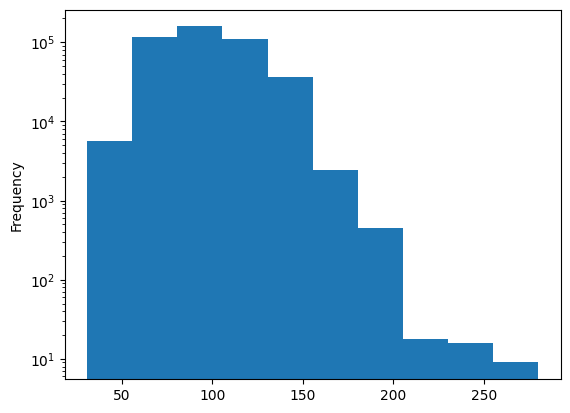

In [86]:
df_train['floor_area_sqm'].plot(kind='hist', logy=True)
print(df_train['floor_area_sqm'].describe())
df_train['floor_area_sqm'].quantile(q=0.9)

# need to remove outliners: 0.9 quantile?

df_train[df_train['floor_area_sqm'] > 200]

## Feature: flat_model

In [39]:
df_train['flat_model'].unique()

array(['model a', 'improved', 'premium apartment', 'new generation',
       'apartment', 'simplified', 'standard', 'adjoined flat',
       'multi generation', 'maisonette', 'model a2', 'model a maisonette',
       'dbss', 'improved maisonette', 'terrace', 'type s1', 'type s2',
       '2 room', 'premium apartment loft', 'premium maisonette'],
      dtype=object)

In [45]:
index_to_drop = df_train[df_train['flat_model'] == '2 room'].index
df_train.drop(index=index_to_drop, inplace=True)
df_train['flat_model'].unique()

array(['model a', 'improved', 'premium apartment', 'new generation',
       'apartment', 'simplified', 'standard', 'adjoined flat',
       'multi generation', 'maisonette', 'model a2', 'model a maisonette',
       'dbss', 'improved maisonette', 'terrace', 'type s1', 'type s2',
       'premium apartment loft', 'premium maisonette'], dtype=object)

In [53]:
df_train['subzone'].unique()

array(['pasir ris drive', 'punggol field', 'fernvale', 'clementi north',
       'bukit batok west', 'bukit batok east', 'jurong west central',
       'aljunied', 'northland', 'guilin', 'saujana', 'serangoon north',
       'yuhua west', 'lavender', 'hougang east', 'woodlands east',
       'woodgrove', 'tampines west', 'peng siang', 'senja',
       'marine parade', 'toa payoh central', 'tampines east',
       'bukit batok central', 'midview', 'hougang west', 'holland drive',
       'serangoon garden', 'bedok south', 'bishan east', 'potong pasir',
       'yishun west', 'yio chu kang west', 'rivervale', 'balestier',
       'bedok north', 'lorong ah soo', 'yishun south', 'hong kah',
       'woodlands west', 'compassvale', 'khatib', 'sembawang north',
       'yishun east', 'trafalgar', 'woodlands south', 'braddell',
       'chong boon', 'pasir ris west', 'kovan', 'simei',
       'serangoon central', 'geylang east', 'kaki bukit', 'tanglin halt',
       'choa chu kang north', 'crawford', 'faja

## Feature: eco_category

In [50]:
df_train.drop(columns='eco_category', inplace=True)

In [51]:
df_train['lease_commence_date'].unique()

array([1989, 2003, 2004, 1980, 1985, 1998, 2000, 1988, 1999, 1992, 1990,
       1993, 1984, 2013, 1975, 1995, 1997, 1994, 1986, 1978, 2005, 1974,
       1983, 1987, 2007, 2001, 1970, 1979, 1996, 1982, 2015, 1969, 2006,
       1981, 2010, 2002, 1968, 2016, 1966, 1991, 1976, 2009, 2012, 1971,
       1967, 1977, 2014, 1972, 1973, 2008, 2011, 2017, 2019, 2018])

In [65]:
d = df_train[['year', 'mth', 'num_rooms', 'is_executive', 'is_multi_gen', 'lease_commence_date', 'floor_area_sqm']]

In [66]:
X = d.to_numpy(dtype=np.float64)
y = df_train['resale_price'].to_numpy(dtype=np.float64)


In [68]:
print(X.shape, y.shape)

(431713, 7) (431713,)


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(323784, 7) (107929, 7) (323784,) (107929,)


In [76]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [80]:
y_model = model.predict(X_test)
r2_score(y_test, y_model)

0.6654270074509717

In [81]:
cross_val_score(model, X, y)

array([0.66617255, 0.66676675, 0.66597411, 0.66262871, 0.66360512])

In [82]:
from sklearn.ensemble import GradientBoostingRegressor

model_gbr = GradientBoostingRegressor()

cross_val_score(model_gbr, X, y)

array([0.81140318, 0.80966662, 0.80796269, 0.80764846, 0.80713336])

# Feature engineering in a more systematic way

In [95]:
class FeatureTransformerBase:
    final_columns = list()
    label_col_name = None
    def __init__(self, df):
        self.df = df
        assert self.label_col_name not in self.final_columns
        if self.label_col_name is None:
            raise NotImplementedError
        self.is_labeled = (self.label_col_name in df.columns)
        self.df_new = self.transform_dataframe(self.df.copy())
        
    def transform_dataframe(self, df):
        raise NotImplementedError
        
    def get_X(self):
        return self.df_new[self.final_columns].to_numpy(dtype=np.float64)
    def get_y(self):
        if not self.is_labeled:
            raise ValueError(f"Label col: {self.label_col_name} not exists in input data.")
        return self.df_new[self.label_col_name].to_numpy(dtype=np.float64)        

In [96]:
class FeatureTransformerLocationNaive(FeatureTransformerBase):
    final_columns = [
        'year', 'mth', 'num_rooms', 'is_executive', 'is_multi_gen', 
        'storey_level', 'lease_commence_date', 'floor_area_sqm'
    ]
    label_col_name = 'resale_price'
    
    def transform_dataframe(self, df):
        # month
        df[['year', 'mth']] = df_train['month'].str.split('-', expand=True)
        df = df.astype({'year': 'int', 'mth': 'int'})
        # flat_type
        def parse_flat_type(s_type):
            if not isinstance(s_type, str):
                return pd.Series((None, None, None))
            if s_type[0] in ['1', '2', '3', '4', '5']:
                return pd.Series((int(s_type[0]), False, False))
            elif s_type == 'executive':
                return pd.Series((0, True, False))
            elif s_type == 'multi generation':
                return pd.Series((0, False, True))
            else:
                return pd.Series((None, None, None))
        df[['num_rooms', 'is_executive', 'is_multi_gen']] = df['flat_type'].apply(parse_flat_type)
        # storey_range
        df['storey_level'] = df['storey_range'].apply(lambda s: int(s[0:2]))
        # flat_model
        if self.is_labeled: # training set, remove invalid records
            index_to_drop = df[df['flat_model'] == '2 room'].index
            df.drop(index=index_to_drop, inplace=True)
        return df

In [97]:
df_train = pd.read_csv("data/train.csv")

feature_transformer = FeatureTransformerLocationNaive(df_train)
X = feature_transformer.get_X()
y = feature_transformer.get_y()

array([[2.001e+03, 8.000e+00, 4.000e+00, ..., 1.000e+00, 1.989e+03,
        1.180e+02],
       [2.014e+03, 1.000e+01, 5.000e+00, ..., 1.000e+01, 2.003e+03,
        1.100e+02],
       [2.020e+03, 9.000e+00, 5.000e+00, ..., 1.000e+00, 2.004e+03,
        1.120e+02],
       ...,
       [2.011e+03, 1.000e+00, 3.000e+00, ..., 1.000e+00, 1.986e+03,
        6.700e+01],
       [2.013e+03, 5.000e+00, 5.000e+00, ..., 1.600e+01, 1.999e+03,
        1.230e+02],
       [2.007e+03, 8.000e+00, 4.000e+00, ..., 1.000e+00, 1.989e+03,
        1.040e+02]])

In [100]:
y

array([209700., 402300., 351000., ..., 255600., 508500., 162000.])